# To predict the housing prices in mumbai using Machine Learning.

In this notebook, we're going to go through an example machine learning project with the goal of predicting the housing prices in mumbai.

## Problem Defination 

 How well can we  predict the prices of housing in mumbai given it's different characteristics.
 
## Data

Data is downloaded from kaggle :https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india

The data contains 6 csv files named with the 6 metropolitician citties of of which are are  going to predict the sale price of mumbai.csv

## Evaluation :

The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSE.

## Content :

* Collection of prices of new and resale houses located in the metropolitan areas of India
* The amenities provided for each houses


In [1]:
# Now let's import some important numpy, pandas and matplotlib lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the data
mumbai_df = pd.read_csv('data/Mumbai.csv')

In [3]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [6]:
mumbai_df.Location.value_counts()


Kharghar                681
Thane West              577
Mira Road East          481
Ulwe                    391
Nala Sopara             225
                       ... 
Chembur Shell Colony      1
Off Nepean Sea Road       1
Marine Lines              1
Bangur Nagar              1
Diva                      1
Name: Location, Length: 413, dtype: int64

In [7]:
mumbai_df.Area.value_counts()

650     319
1050    178
600     165
1100    162
1150    120
       ... 
1246      1
353       1
5320      1
369       1
2061      1
Name: Area, Length: 1140, dtype: int64

In [60]:
mumbai_df.School.value_counts()

9    6321
0    1144
1     254
Name: School, dtype: int64

In [10]:
# Let's see the correlation between each of the columns
df = mumbai_df.corr()

In [9]:
#Let's plot it on heatmap
import seaborn as sns

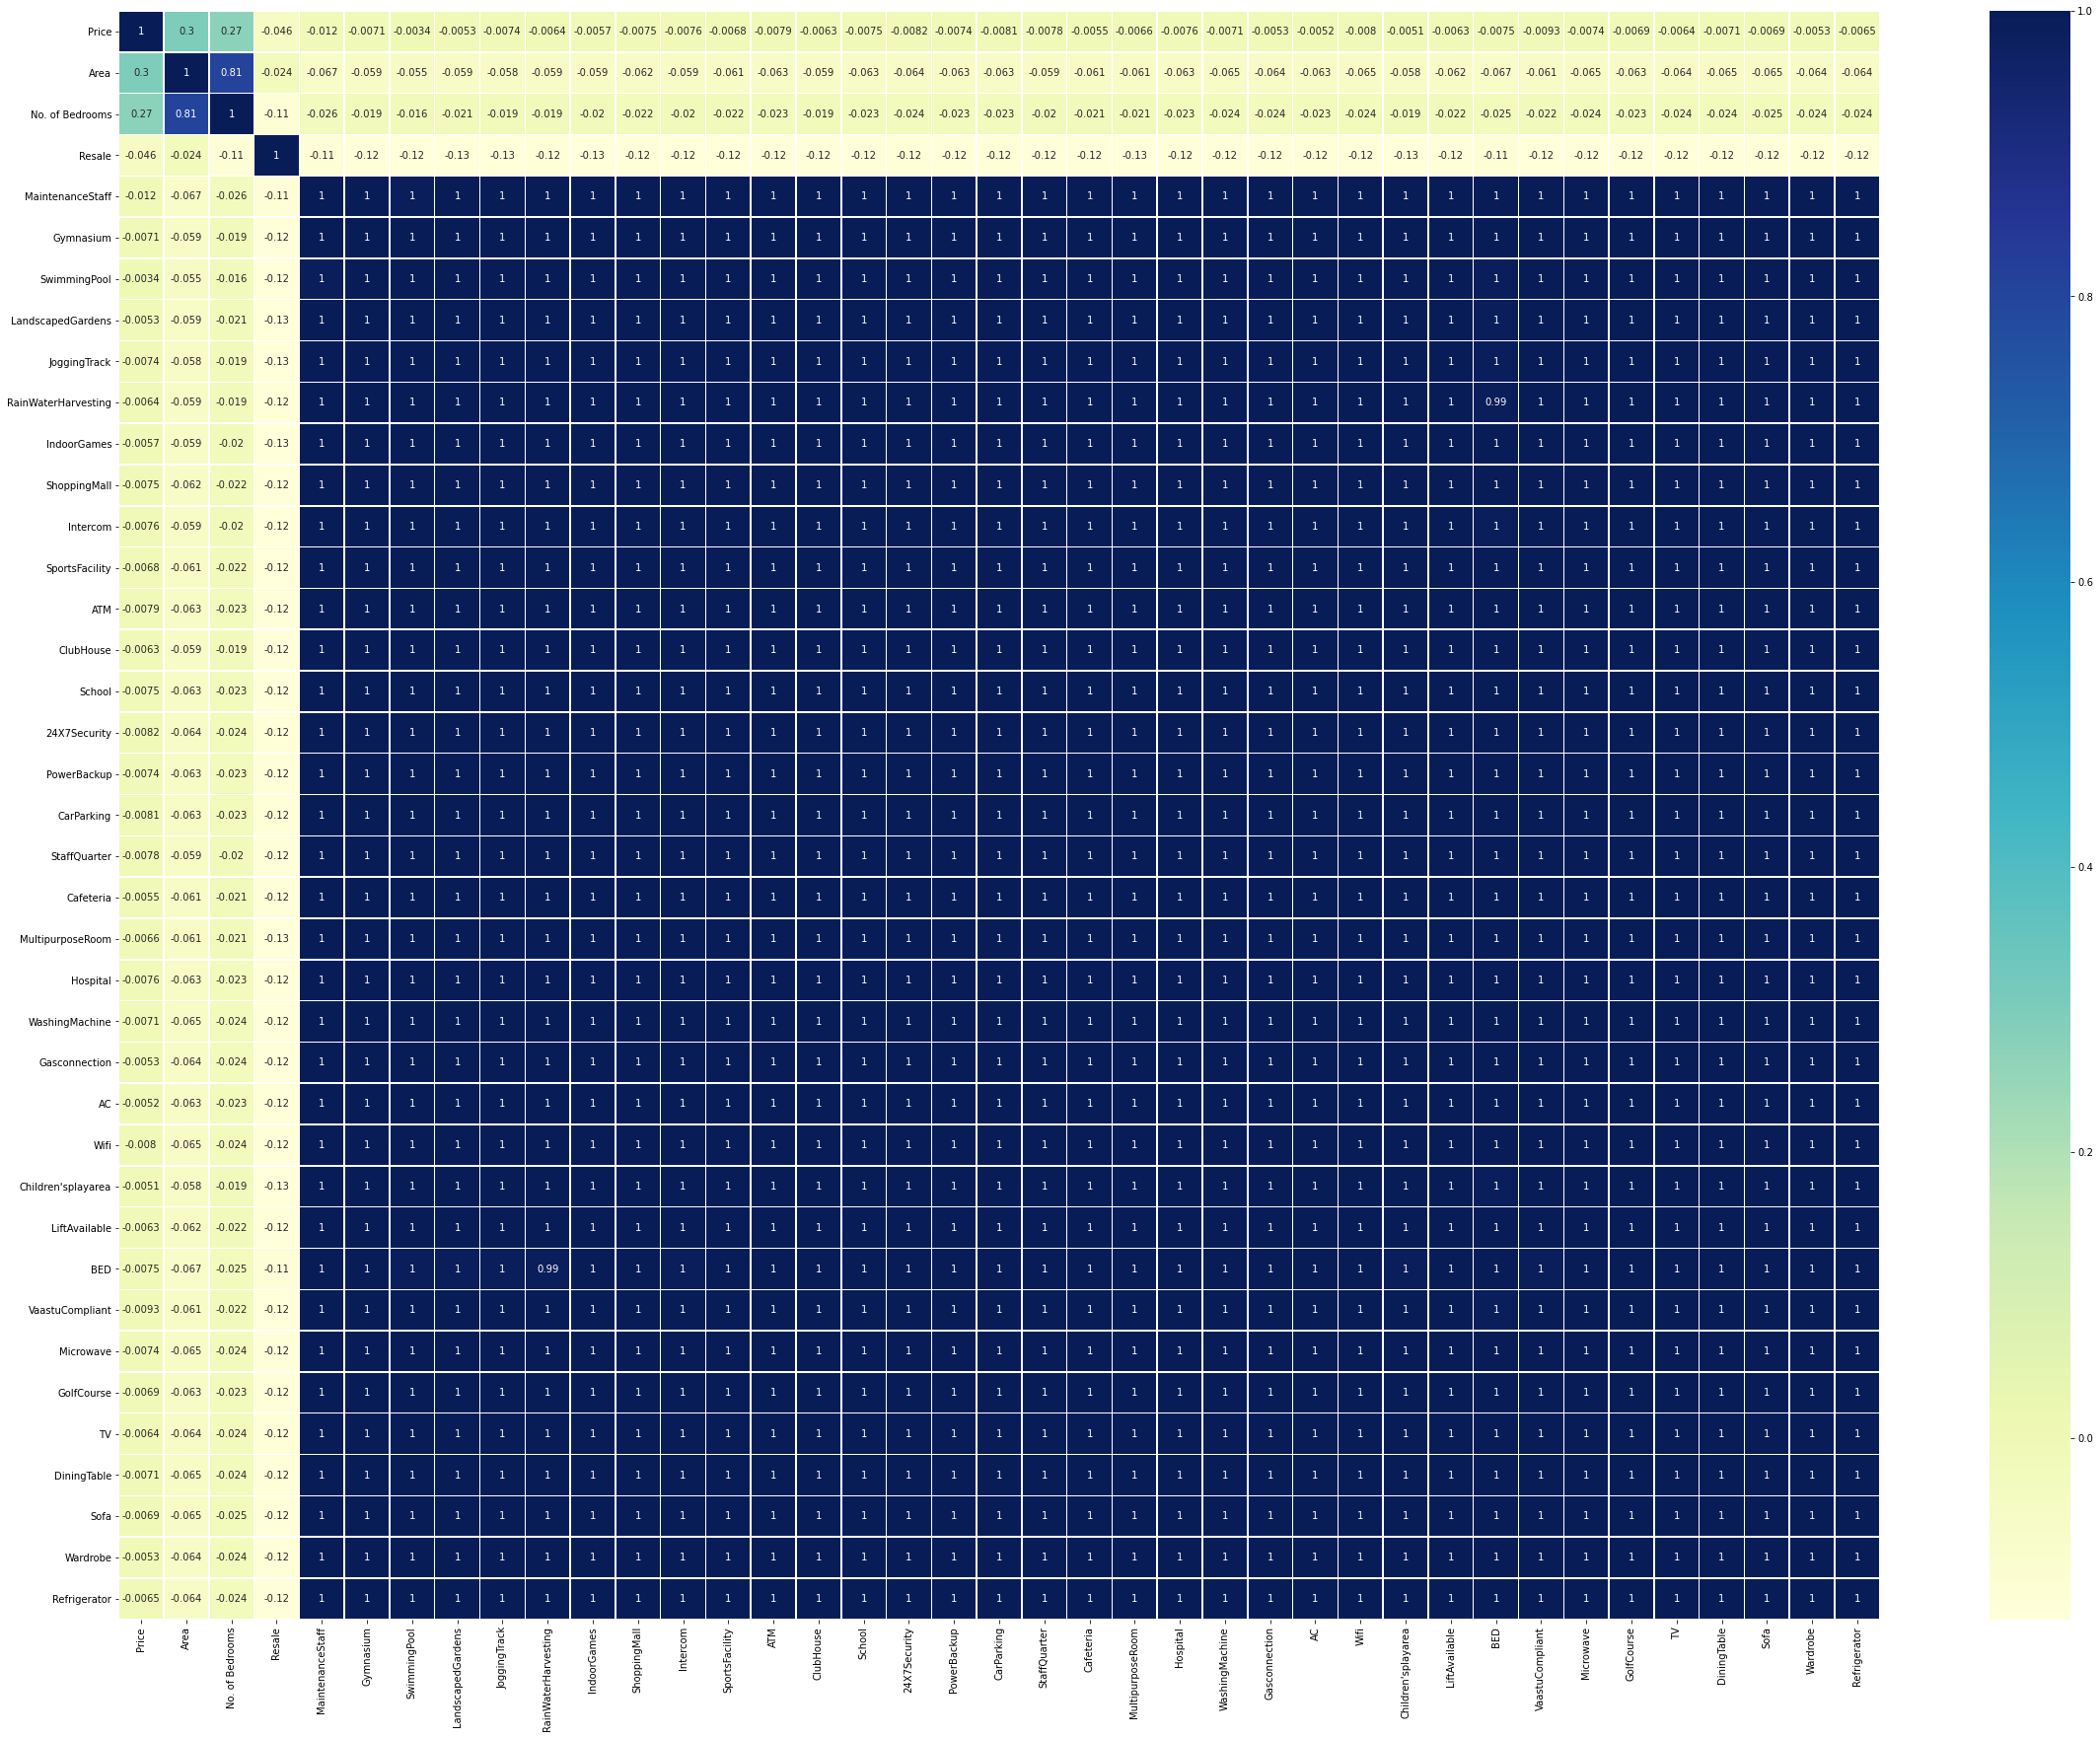

In [13]:
ax,fig = plt.subplots(figsize = (40,30))
ax = sns.heatmap(df,
                 annot = True,
                 linewidths = 0.5,
                 cmap = 'YlGnBu')

**Note** :Correlation coefficient range from -1 to +1. When it is close to 1 it means that there is a strong positive correlation.Like in above eg we can see there is many strong positive correlations. And when the correlation coefficient is close to -1, it means there is a strong negative correlation.

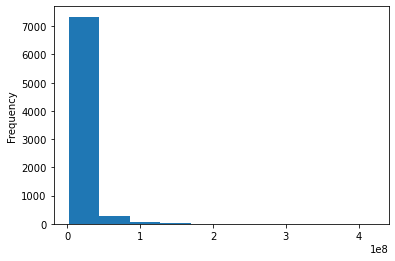

In [16]:
# Now let's plot a histogram of 'Price'
mumbai_df.Price.plot.hist();

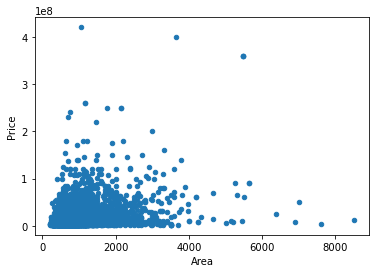

In [23]:
mumbai_df.plot.scatter('Area'[:1000],'Price'[:1000]);

In [25]:
# Now let's see if our data contains any null values or not
mumbai_df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


## Convert String to Categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality


In [26]:
# Find the columns which contain strings
for label,content in mumbai_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Location


In [28]:
# This will turn all of the string value into category values
for label,content in mumbai_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        mumbai_df[label] = content.astype('category').cat.as_ordered()

In [83]:
#we can see that the number of 'not mentioned or 9' are very large.
#This will not help us in predicting the accurate price of the property. So we will remove all the rows containing not mentioned or 9
mumbai_df.replace(9,np.nan,inplace=True)
mumbai_df.dropna(axis=0,how="any",inplace=True)

In [84]:
mumbai_df['ATM'].value_counts()

0.0    1130
1.0     266
Name: ATM, dtype: int64

In [30]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print('The key is : {}'.format(key))
    print('The value is : {}'.format(value))

The key is : key1
The value is : hello
The key is : key2
The value is : world!


In [85]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1396 non-null   int64  
 1   Area                 1396 non-null   int64  
 2   Location             1396 non-null   float64
 3   No. of Bedrooms      1396 non-null   int64  
 4   Resale               1396 non-null   int64  
 5   MaintenanceStaff     1396 non-null   float64
 6   Gymnasium            1396 non-null   float64
 7   SwimmingPool         1396 non-null   float64
 8   LandscapedGardens    1396 non-null   float64
 9   JoggingTrack         1396 non-null   float64
 10  RainWaterHarvesting  1396 non-null   float64
 11  IndoorGames          1396 non-null   float64
 12  ShoppingMall         1396 non-null   float64
 13  Intercom             1396 non-null   float64
 14  SportsFacility       1396 non-null   float64
 15  ATM                  1396 non-null   f

In [34]:
mumbai_df.Location.cat.codes

0       136
1       136
2       136
3       136
4       136
       ... 
7714    179
7715    190
7716    320
7717    179
7718    179
Length: 7719, dtype: int16

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

In [86]:
# Turn categorical variables into numbers and add plus 1
mumbai_df['Location'] = pd.Categorical(mumbai_df['Location']).codes + 1

In [87]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1396 non-null   int64  
 1   Area                 1396 non-null   int64  
 2   Location             1396 non-null   int16  
 3   No. of Bedrooms      1396 non-null   int64  
 4   Resale               1396 non-null   int64  
 5   MaintenanceStaff     1396 non-null   float64
 6   Gymnasium            1396 non-null   float64
 7   SwimmingPool         1396 non-null   float64
 8   LandscapedGardens    1396 non-null   float64
 9   JoggingTrack         1396 non-null   float64
 10  RainWaterHarvesting  1396 non-null   float64
 11  IndoorGames          1396 non-null   float64
 12  ShoppingMall         1396 non-null   float64
 13  Intercom             1396 non-null   float64
 14  SportsFacility       1396 non-null   float64
 15  ATM                  1396 non-null   f

## Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.


In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [88]:
# Splitting the data into x and y
x = mumbai_df.drop(["Price","MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis = 1)
y = mumbai_df['Price']
np.random.seed(42)
# splitting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.2)

In [109]:
# Creating an evaluation function
def rmse(y_test,y_preds):
    """
    Caculates root mean squared error between predictions and
    true labels.
    """
    return (np.sqrt(mean_squared_error(y_test,y_preds)))

# Create function to evaluate model on a few different levels
def scores(model):
    y_preds = model.predict(x_test)
    dictionary = {'RMSE':rmse(y_test,y_preds),
                  'MAE' : mean_absolute_error(y_test,y_preds),
                  'r2_score':r2_score(y_test,y_preds)}
    return dictionary

In [90]:
# Let's train a model :
np.random.seed(42)
model_reg = LinearRegression(n_jobs = -1)
model_reg.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [91]:
scores(model_reg)

{'RMSE': 21266951.413448025,
 'MAE': 8993470.622041157,
 'r2_score': 0.5782072683197488}

In [94]:
model_rf = RandomForestRegressor(n_jobs= -1,random_state = 42)
model_rf.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
scores(model_rf)

{'RMSE': 12564954.851458104,
 'MAE': 4750025.942572086,
 'r2_score': 0.8527651972722508}

## Hyperparameter tuning with RandomizedSearchCV

In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV
#Different RandomForestRegressor hyperparameters
rs_grid = {'n_estimators' : np.arange(200,500,100),
        'max_features':[0.5,1,'auto'],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,1),
        'max_depth':[None,5,10]}
np.random.seed(42)
# Instantiate GridSearchCV model
rs_randomsearch = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions = rs_grid,
                             cv  = 5,
                             n_iter = 3,
                             verbose = True)

# Fit the gridSearchModel 

rs_randomsearch.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.0s finished


CPU times: user 12.5 s, sys: 25.9 ms, total: 12.5 s
Wall time: 13.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': [0.5, 1, 'auto'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([200, 300, 400])},
                   verbose=True)

In [101]:
rs_randomsearch.best_params_


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [102]:
ideal_model = RandomForestRegressor(n_estimators = 400,
                                    min_samples_split = 10,
                                    min_samples_leaf = 1,
                                    max_features = 0.5,
                                    max_depth = 10,
                                    random_state = 42)
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=10,
                      n_estimators=400, random_state=42)

In [110]:
scores(ideal_model)

{'RMSE': 14847540.574982667,
 'MAE': 5728446.429744845,
 'r2_score': 0.7944120502464215}

As u can see sometimes by using hyperparameter tuning the mean absolute error may get decreased.

In [113]:
a = mean_squared_error(y_test,ideal_model.predict(x_test))
np.sqrt(a)

14847540.574982667

In [117]:
ideal_model.predict(x_test)

array([1.71092085e+07, 5.77626396e+06, 1.76816034e+07, 5.96573258e+07,
       5.43502537e+06, 6.38945612e+06, 1.19684697e+07, 6.32677419e+07,
       1.81286998e+07, 4.98700279e+06, 1.57681212e+07, 4.03260011e+07,
       1.13473973e+07, 2.39164707e+07, 1.16700438e+07, 1.33751483e+08,
       5.54851503e+06, 1.65199917e+07, 1.21377177e+07, 1.11703627e+07,
       4.80907798e+06, 8.49578494e+06, 1.20122024e+07, 9.25182990e+06,
       1.46825763e+07, 7.04162463e+07, 1.11944759e+07, 1.37023315e+07,
       8.88287947e+06, 3.93066037e+06, 6.41308245e+06, 2.56203338e+07,
       5.18330075e+06, 8.81178992e+06, 1.40058781e+07, 3.47677535e+07,
       3.47390889e+06, 5.34018735e+06, 4.56961299e+06, 3.78913349e+06,
       5.17098065e+06, 2.57599531e+07, 2.60161524e+07, 2.46466459e+07,
       2.89200029e+07, 8.73939388e+06, 6.03835571e+06, 5.91821149e+07,
       1.22958599e+07, 1.46142052e+07, 3.42854296e+07, 1.35053094e+07,
       1.68272072e+07, 9.90005681e+06, 6.32363926e+06, 1.12933566e+07,
      

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
one_hot = OneHotEncoder()

{'RMSE': 19229728.65839516,
 'MAE': 6156991.334817288,
 'r2_score': 0.6551462711815879}